# Base de Dados: Red Wine Quality

Dataset: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

O objetivo desse estudo consiste em entender as relações de qualidade e outros atributos dos tipos de vinho baseada nos dados disponíveis sobre os testes físico-químicos realizados na safra.


---

# Imports para o programa

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Importando o Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arquivo = '/content/drive/MyDrive/Lab_pg/winequality-red.csv'
df_rw = pd.read_csv(arquivo, header = 0, delimiter=";")
df_rw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Análise e identificação dos dados

In [ ]:
#Verificando os tipos e nomes de cada variável

df_rw.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Analisando os tipos do dados presentes no dataset, pode-se notar que todos os dados, exceto pela qualidade, que é um inteiro, variam entre números do tipo 'float'.


---



**Variáveis de entrada:**

1 - fixed acidity (Acidez fixa)

2 - volatile acidity (Acidez volátil)

3 - citric acid (Ácido cítrico)

4 - residual sugar (Açúcar residual)

5 - chlorides (Cloreto)

6 - free sulfur dioxide (Anidrido Sulfuroso Livre)

7 - total sulfur dioxide (Anidrido Sulfuroso Total) 

8 - density (Densidade)

9 - pH (auto-explicativo)

10 - sulphates (Sulfatos)

11 - alcohol (Álcool)


---


**Variável de saída:**

12 - quality (qualidade, uma pontuação entre 0 e 10)


---

A variável-alvo (ou target variable) selecionada é justamente a variável de saída, qualidade, pois sua análise dependerá dos resultados ponderados pela verificação das demais variáveis.

In [ ]:
#A função abaixo do dataframe do pandas permite verificar a quantidade total de valores não nulos de cada variável

df_rw.info()

#Nesse caso, facilmente observa-se que não há nenhum valor nulo para qualquer variável, em qualquer registro.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Pode-se observar que todas as features presentes no dataset são numéricas, sendo:**
*   11 variáveis contínuas: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates e alcohol.
*   1 variável discreta: quality.



In [ ]:
#Permite inferir que o dataframe conta com 1599 linhas distintas (registros, nesse caso, vinhos) e 12 colunas distintas (variáveis).

df_rw.shape

(1599, 12)

# Detalhamento dos dados

In [ ]:
df_rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df_rw['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

Calcula o percentual de dados faltantes. Nenhum dado está faltando.

In [ ]:
round(df_rw.isnull().mean() *100,2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

# Análise da Dispersão de Qualidades

Retorna uma tabela de frequência de aparição de um determinado valor em um grupo. Nesse caso, agrupando os vinhos pela sua qualidade, pode-se observar que a maioria possui valores de qualidade medíocres, enquanto poucos vinhos apresentam níveis de qualidade muito alta e muito baixa.

In [ ]:
counts = df_rw.groupby('quality')['quality'].count()
table = PrettyTable()
table.field_names = ['Quality', 'Count']
for quality, count in counts.items():
    table.add_row([quality, count])
print(table.get_string())

+---------+-------+
| Quality | Count |
+---------+-------+
|    3    |   10  |
|    4    |   53  |
|    5    |  681  |
|    6    |  638  |
|    7    |  199  |
|    8    |   18  |
+---------+-------+


Nesse caso, a célula abaixo verifica quais valores únicos uma determinada coluna pode apresentar, sendo assim, utilizando o método sort do numpy, conseguimos averiguar que as notas de qualidade variam em um intervalo inteiro inclusivo de 3 até 8.

In [ ]:
x = np.sort(df_rw['quality'].unique())
x

array([3, 4, 5, 6, 7, 8])

In [ ]:
df_rw['quality'].value_counts()
table = PrettyTable()
table.field_names = ['Quality', 'frequency']
for quality, count in counts.items():
    table.add_row([quality, count])
print(table.get_string())

+---------+-----------+
| Quality | frequency |
+---------+-----------+
|    3    |     10    |
|    4    |     53    |
|    5    |    681    |
|    6    |    638    |
|    7    |    199    |
|    8    |     18    |
+---------+-----------+


Cada fatia do gráfico de pizza representa a porcentagem de vinhos que receberam uma determinada nota, sendo que as notas variam de 3 a 8. No dataset escolhido, 12.4% dos vinhos receberam a nota 7, então a fatia correspondente no gráfico de pizza terá 12,4% do tamanho do gráfico.

Text(0.5, 1.0, 'Percentual de Dispersão de Notas')

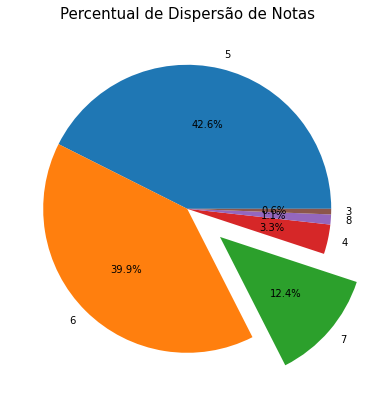

In [ ]:
#Gráfico Pizza
#Cria a figura e traça os traça os eixos
fig = plt.figure(figsize=(6,5))
eixo = fig.add_axes([0,0,1,1])

Labels = []
explodir = [0,0,0.3,0,0,0]

#Dar ênfase em determinados valores - explode
eixo.pie(df_rw['quality'].value_counts(), explode=explodir, shadow=False, labels = ['5', '6', '7', '4', '8', '3'], autopct='%.1f%%')
eixo.set_title('Percentual de Dispersão de Notas', size=15, pad=10)

In [ ]:
df_rw.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
corr = df_rw.corr()
quality_row = corr.loc['quality']
top_correlations = quality_row.sort_values(ascending=False).head(4)
top_correlations = top_correlations.drop(top_correlations.index[0])
table = PrettyTable()
table.field_names = ['characteristic', 'relationship']
for quality, count in top_correlations.items():
    table.add_row([quality, count])
print(table.get_string())

+----------------+---------------------+
| characteristic |     relationship    |
+----------------+---------------------+
|    alcohol     | 0.47616632400113656 |
|   sulphates    | 0.25139707906925995 |
|  citric acid   | 0.22637251431804045 |
+----------------+---------------------+


Os gráficos são uma representação da relação entre a qualidade do vinho e suas características químicas, mostrando a média de cada característica para cada valor de qualidade. Eles podem ajudar a identificar padrões e correlações entre a qualidade do vinho e suas características químicas, o que pode ser útil na determinação dos fatores que afetam a qualidade do vinho.

<Axes: xlabel='quality', ylabel='alcohol'>

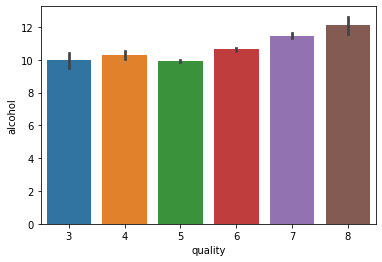

In [ ]:
sns.barplot(x='quality', y='alcohol',data=df_rw)

<Axes: xlabel='quality', ylabel='alcohol'>

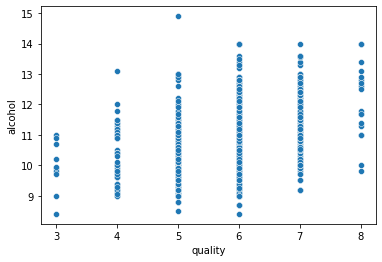

In [ ]:
sns.scatterplot(x= 'quality', y= 'alcohol', data=df_rw)

<Axes: xlabel='quality', ylabel='citric acid'>

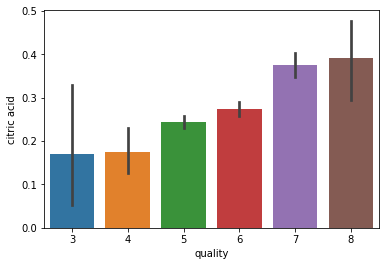

In [ ]:
sns.barplot(x='quality', y='citric acid',data=df_rw)

<Axes: xlabel='quality', ylabel='citric acid'>

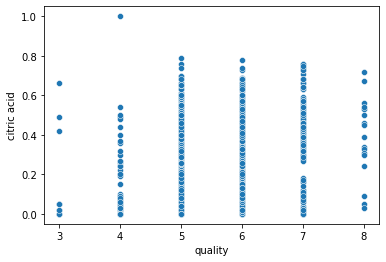

In [ ]:
sns.scatterplot(x= 'quality', y= 'citric acid', data=df_rw)

<Axes: xlabel='quality', ylabel='sulphates'>

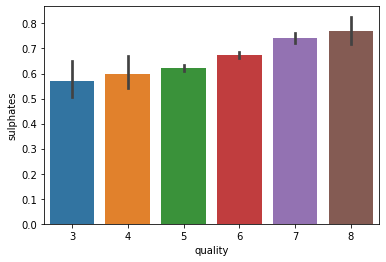

In [ ]:
sns.barplot(x='quality', y='sulphates', data=df_rw)

<Axes: xlabel='quality', ylabel='sulphates'>

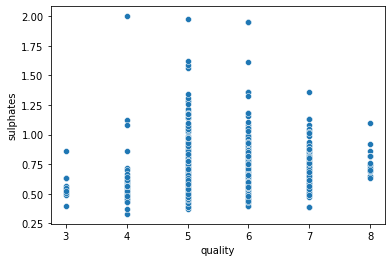

In [ ]:
sns.scatterplot(x= 'quality', y= 'sulphates', data=df_rw)

# Quantidade de vinhos em relação às notas

<Axes: xlabel='quality', ylabel='Count'>

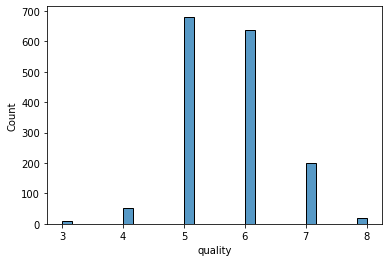

In [ ]:
sns.histplot(df_rw, x='quality')

<Axes: ylabel='density'>

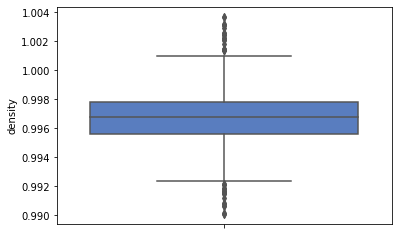

In [ ]:
# Gerar o bloxpot para checar os valores outliers da densidade
sns.boxplot(y='density', data=df_rw, palette='muted')

<Axes: xlabel='quality', ylabel='alcohol'>

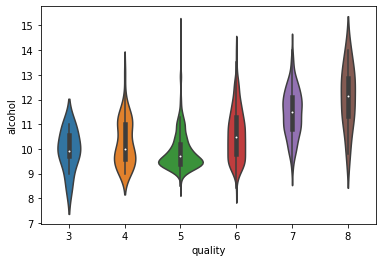

In [ ]:
# Relaciona as respectivas qualidades com a densidade de valores de teor alcoólico que os vinhos possuem;
# Evidencia, também as outliers
sns.violinplot(x='quality', y='alcohol', data=df_rw)

<Axes: >

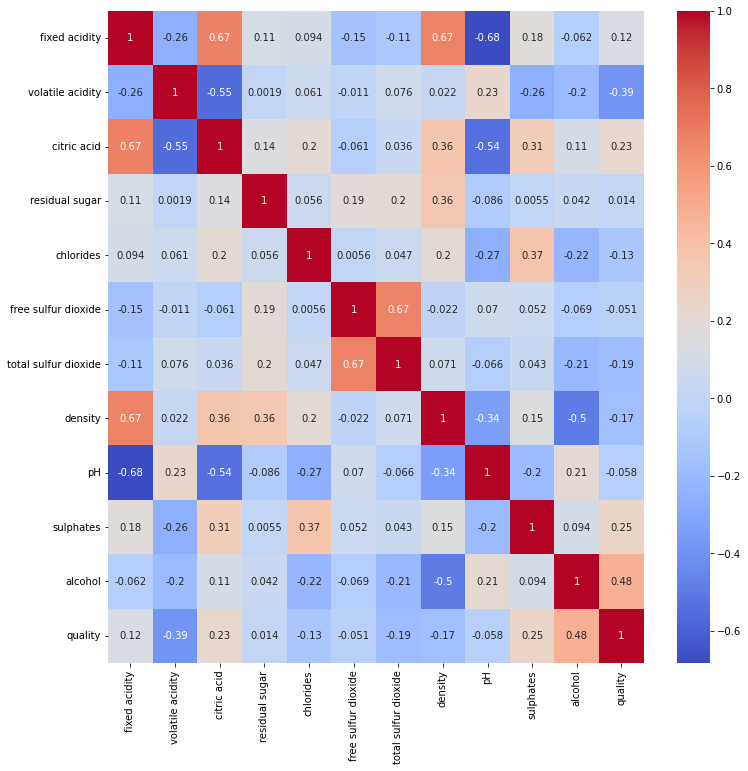

In [ ]:
plt.subplots(figsize=(12,12))
sns.heatmap(df_rw.corr(), cmap='coolwarm', annot=True)